In [ ]:
import tensorflow as tf

import numpy as np
import os
from tensorflow import keras
#import keras
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold

from keras_preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
data_path = "/home/muhlabws4/Belgeler/Pet"

In [ ]:
class_folders = os.listdir(data_path)

In [ ]:
images = []
labels = []

In [ ]:
for i , class_name in enumerate(class_folders):
    class_folder_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_folder_path)
    
    for img_name in class_images:
        img_path = os.path.join(class_folder_path, img_name)
        img = load_img(img_path, target_size=(128,128))
        img_array = img_to_array(img) /255.0
        images.append(img_array)
        labels.append(class_name)

In [ ]:
X = np.array(images)
y = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

In [ ]:
X_shuf, y_shuf = X, y_encoder

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X_shuf, y_shuf, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)
print(y_encoder.shape)

In [ ]:
class_names = ['angry', 'other','sad', 'happy']

In [ ]:
def cross_validation(model, X, y, n_splits=5, epochs=5, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #result = []
    for train_inx, val_inx in kfold.split(X):
        X_train, X_val = X[train_inx], X[val_inx]
        y_train, y_val = y[train_inx], y[val_inx]
        
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        a = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, class_weight={0:3,1:4,2:3,3:3})
        #model.fit(X_train, y_train, epochs=epochs)
        #result.append(a.history['val_accuracy'])
        
    #return result

In [13]:
def gosterTrain(index):
    plt.figure(figsize=(15,2))
    plt.imshow(train_images[index])
    plt.title(class_names[train_labels[index]])

In [14]:
def gosterTest(index):
    plt.figure(figsize=(15,2))
    plt.imshow(test_images[index])
    plt.title(class_names[test_labels[index]])

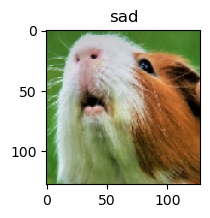

In [15]:
gosterTrain(10)

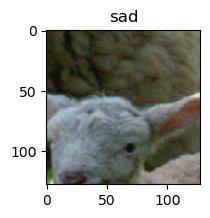

In [16]:
gosterTest(70)

In [17]:
model = models.Sequential([
    #cnn
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.2),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    layers.Dense(4,activation='softmax')
])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_images, train_labels, epochs=10)

2023-08-11 13:44:50.649851: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 13:44:50.666628: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-11 13:44:50.666777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [18]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128,3)),

    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10)
])

#model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [19]:
result = cross_validation(model, train_images, train_labels, n_splits=3, epochs=3, batch_size=32)

Epoch 1/3


2023-08-11 13:44:52.689598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-11 13:44:52.747480: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2023-08-11 13:44:52.836950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-11 13:44:52.856851: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x447e4e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-11 13:44:52.856867: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2023-08-11 13:44:52.861479: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-11 13:44:52.907448: I tensorflow/tsl/

17/17 - 2s - loss: 8.5872 - accuracy: 0.2552 - 2s/epoch - 121ms/step
Epoch 2/3
17/17 - 0s - loss: 4.4585 - accuracy: 0.2702 - 218ms/epoch - 13ms/step
Epoch 3/3
17/17 - 0s - loss: 4.3077 - accuracy: 0.3583 - 226ms/epoch - 13ms/step
Epoch 1/3
17/17 - 1s - loss: 4.1323 - accuracy: 0.3921 - 941ms/epoch - 55ms/step
Epoch 2/3
17/17 - 0s - loss: 3.2440 - accuracy: 0.6191 - 251ms/epoch - 15ms/step
Epoch 3/3
17/17 - 0s - loss: 2.3025 - accuracy: 0.7580 - 229ms/epoch - 13ms/step
Epoch 1/3
17/17 - 1s - loss: 3.0321 - accuracy: 0.6255 - 1s/epoch - 70ms/step
Epoch 2/3


2023-08-11 13:44:57.591076: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 288.40MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


17/17 - 0s - loss: 1.8571 - accuracy: 0.7903 - 236ms/epoch - 14ms/step
Epoch 3/3
17/17 - 0s - loss: 1.0496 - accuracy: 0.9007 - 270ms/epoch - 16ms/step


In [22]:
for i, resul in enumerate(result):
    print(f"Fold {i+1} Başarı Değeri:", resul[i])

TypeError: 'NoneType' object is not iterable

In [20]:
sonuc = cross_validation(model2, train_images, train_labels, n_splits=4, epochs=4, batch_size=32)

Epoch 1/4
19/19 - 1s - loss: 8.9617 - accuracy: 0.0150 - 578ms/epoch - 30ms/step
Epoch 2/4
19/19 - 0s - loss: 7.4681 - accuracy: 0.0000e+00 - 129ms/epoch - 7ms/step
Epoch 3/4
19/19 - 0s - loss: 7.4681 - accuracy: 0.0000e+00 - 90ms/epoch - 5ms/step
Epoch 4/4
19/19 - 0s - loss: 7.4681 - accuracy: 0.0000e+00 - 108ms/epoch - 6ms/step
Epoch 1/4
19/19 - 0s - loss: 7.4642 - accuracy: 0.0000e+00 - 473ms/epoch - 25ms/step
Epoch 2/4
19/19 - 0s - loss: 7.4642 - accuracy: 0.0000e+00 - 109ms/epoch - 6ms/step
Epoch 3/4
19/19 - 0s - loss: 7.4642 - accuracy: 0.0000e+00 - 122ms/epoch - 6ms/step
Epoch 4/4
19/19 - 0s - loss: 7.4642 - accuracy: 0.0000e+00 - 58ms/epoch - 3ms/step


2023-08-11 13:45:11.624346: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 112.50MiB (rounded to 117964800)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-08-11 13:45:11.624412: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-08-11 13:45:11.624436: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 101, Chunks in use: 101. 25.2KiB allocated for chunks. 25.2KiB in use in bin. 4.2KiB client-requested in use in bin.
2023-08-11 13:45:11.624449: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 7, Chunks in use: 7. 3.5KiB allocated for chunks. 3.5KiB in use in bin. 3.5KiB client-requested in use in bin.
2023-08-11 13:45:11.624462: I tensorflow/tsl/framewo

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
for i, resul in enumerate(sonuc):
    print(f"Fold {i+1} Başarı Değeri:", resul[i])

In [ ]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model2.fit(train_images, train_labels, epochs=5)

In [ ]:
#model.fit(train_images, train_labels, epochs=8)

In [2]:
model.evaluate(test_images, test_labels)

NameError: name 'model' is not defined

In [ ]:
model2.evaluate(test_images, test_labels)

In [ ]:
tahminler = model.predict(test_images)

In [ ]:
y_pred_classes = np.argmax(tahminler,axis=1)

In [ ]:
tahminler[:7]

In [29]:
np.argmax(tahminler[7])

2

In [30]:
test_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 3, 3, 1, 0, 2,
       1, 0, 2, 2, 2, 3, 3, 3, 1, 2, 0, 1, 1, 2, 0, 0, 3, 2, 1, 2, 1, 3,
       1, 1, 3, 0, 1, 3, 0, 3, 1, 0, 2, 2, 0, 2, 2, 3, 1, 2, 0, 2, 0, 0,
       0, 3, 2, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 3, 0,
       3, 1, 1, 1, 0, 2, 3, 1, 3, 2, 2, 3, 0, 1, 3, 1, 0, 0, 0, 3, 2, 3,
       0, 3, 3, 3, 2, 1, 2, 3, 0, 1, 3, 1, 0, 1, 2, 0, 0, 1, 3, 3, 0, 3,
       1, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 3, 3, 3, 2, 3, 1, 0, 2, 3, 1,
       3, 1, 1, 0, 2, 3, 0, 3, 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 3, 0, 1, 0, 1, 0, 3, 2, 1, 1, 3, 0, 3, 3, 0, 2, 2, 1, 1, 2,
       0, 2])

In [31]:
y_pred_classes

array([0, 0, 0, 0, 3, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 3,
       2, 1, 2, 2, 2, 2, 1, 0, 2, 3, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 3,
       1, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0,
       0, 3, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2, 1, 0,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 3, 2, 3, 0, 1, 2, 1, 3, 1, 2, 2, 2, 3,
       2, 3, 0, 2, 1, 1, 0, 1, 0, 2, 3, 3, 3, 2, 1, 2, 1, 1, 2, 1, 2, 3,
       2, 3, 0, 2, 2, 2, 1, 3, 0, 2, 0, 3, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 3, 0, 0, 3, 0, 0, 3, 0, 2, 0, 2, 0, 1, 3, 2, 2, 1, 0,
       3, 1, 2, 1, 1, 2, 3, 0, 2, 0, 3, 2, 3, 1, 2, 1, 0, 2, 2, 3, 1, 2,
       1, 3])

In [32]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52        55
           1       0.44      0.40      0.42        52
           2       0.32      0.59      0.42        44
           3       0.42      0.29      0.34        49

    accuracy                           0.42       200
   macro avg       0.45      0.43      0.42       200
weighted avg       0.46      0.42      0.43       200



In [33]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

In [34]:
print(conf_matrix)

[[24 13 16  2]
 [ 5 21 16 10]
 [ 6  5 26  7]
 [ 3  9 23 14]]


In [35]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

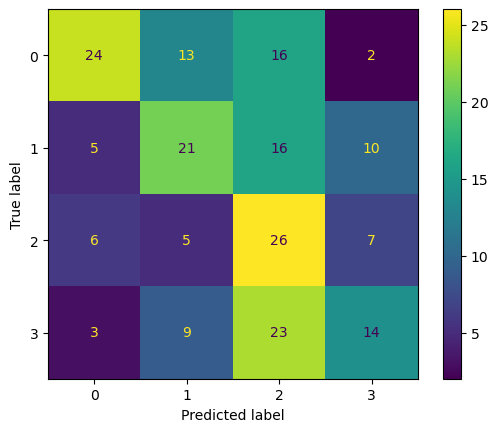

In [36]:
cm_display.plot()
plt.show() 

In [37]:
def tablo(confusion_matrix, index):
    TP=confusion_matrix[index][index]
    FN=sum(confusion_matrix[index][:index])+sum(confusion_matrix[index][index+1:])
    FP=sum(np.transpose(confusion_matrix)[index][:index])+sum(np.transpose(confusion_matrix)[index][index+1:])
    TN=sum(sum(confusion_matrix))-TP-FN-FP
    return TP,TN,FP,FN

In [38]:
def acc(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    acc = (TN+TP)/(TN+TP+FP+FN)
    return acc

In [39]:
def precision(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    p = (TP)/(TP+FP)
    return p

In [40]:
def sensitivity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sn = (TP)/(TP+FN)
    return sn

In [41]:
def specificity(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    sp = (TN)/(TN+FP)
    return sp

In [42]:
def f_score(confusion_matrix,index):
    p=precision(confusion_matrix,index)
    sn=sensitivity(confusion_matrix,index)
    f_score = ((p*sn)/(p+sn))*2
    return f_score

In [43]:
def recall(confusion_matrix,index):
    TP,TN,FP,FN = tablo(confusion_matrix,index)
    recall = TP/(TP+FN)
    return recall

In [44]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52        55
           1       0.44      0.40      0.42        52
           2       0.32      0.59      0.42        44
           3       0.42      0.29      0.34        49

    accuracy                           0.42       200
   macro avg       0.45      0.43      0.42       200
weighted avg       0.46      0.42      0.43       200



In [45]:
for i in range(4):
    print(f"\n{i} acc:", acc(conf_matrix,i))
    print(f"{i} precision:", precision(conf_matrix,i))
    print(f"{i} sensitivity:", sensitivity(conf_matrix,i))
    print(f"{i} specificity:", specificity(conf_matrix,i))
    print(f"{i} f_score:", precision(conf_matrix,i))
    print(f"{i} recall:", recall(conf_matrix,i))


0 acc: 0.775
0 precision: 0.631578947368421
0 sensitivity: 0.43636363636363634
0 specificity: 0.903448275862069
0 f_score: 0.631578947368421
0 recall: 0.43636363636363634

1 acc: 0.71
1 precision: 0.4375
1 sensitivity: 0.40384615384615385
1 specificity: 0.8175675675675675
1 f_score: 0.4375
1 recall: 0.40384615384615385

2 acc: 0.635
2 precision: 0.32098765432098764
2 sensitivity: 0.5909090909090909
2 specificity: 0.6474358974358975
2 f_score: 0.32098765432098764
2 recall: 0.5909090909090909

3 acc: 0.73
3 precision: 0.42424242424242425
3 sensitivity: 0.2857142857142857
3 specificity: 0.8741721854304636
3 f_score: 0.42424242424242425
3 recall: 0.2857142857142857


In [46]:
f_score(conf_matrix,3)

0.34146341463414637

In [47]:
sensitivity(conf_matrix,3)

0.2857142857142857

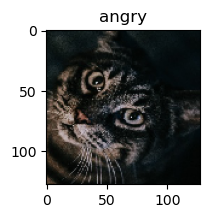

In [48]:
gosterTest(1)

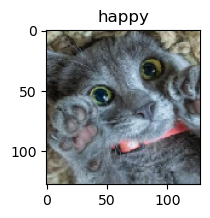

In [49]:
gosterTest(10)

In [50]:
tahmin_class = [np.argmax(i) for i in tahminler]
tahmin_class[10:20]

[1, 2, 1, 1, 2, 3, 1, 3, 2, 1]

In [51]:
test_labels[10:20]

array([3, 2, 0, 3, 3, 3, 1, 3, 3, 1])

In [52]:
print(classification_report(test_labels, tahmin_class,target_names=class_names))

              precision    recall  f1-score   support

       angry       0.63      0.44      0.52        55
       other       0.44      0.40      0.42        52
         sad       0.32      0.59      0.42        44
       happy       0.42      0.29      0.34        49

    accuracy                           0.42       200
   macro avg       0.45      0.43      0.42       200
weighted avg       0.46      0.42      0.43       200

